In [19]:
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp

In [20]:
rcp['lines.linewidth'] = 2.
rcp['font.family'] = 'sans serif'
rcp['font.size'] = 18

In [21]:
mat = np.loadtxt('SO2_WRI_NASA.csv', delimiter=',') # Loads San Pedro pollutant file

In [22]:
# Loads time mm,dd,yyyy HH,mm
month = mat[:, 0]
day = mat[:, 1]
year = mat[:, 2]
hour = mat[:, 3]
time = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii]), np.int(hour[ii])))

In [23]:
o3 = np.ma.masked_invalid(mat[:, 10]) # 03 ppb
pm10 = np.ma.masked_invalid(mat[:, 11]) # pm 10 kg/m3
pm25 = np.ma.masked_invalid(mat[:, 12]) # pm2.5 kg/m3
temp = np.ma.masked_invalid(mat[:, 13]) # temperature C
wind = np.ma.masked_invalid(mat[:, 16]) # wind speed m/s

In [24]:
# Take daily Maximum
time_day = np.reshape(time, (1095, 24)).mean(1)
o3_day = np.reshape(o3, (1095, 24)) # Why 1095
pm10_day = np.reshape(pm10, (1095, 24)) # Why 1095
pm25_day = np.reshape(pm25, (1095, 24)) # Why 1095
temp_day = np.reshape(temp, (1095, 24)) # Why 1095
wind_day = np.reshape(wind, (1095, 24)) # Why 1095

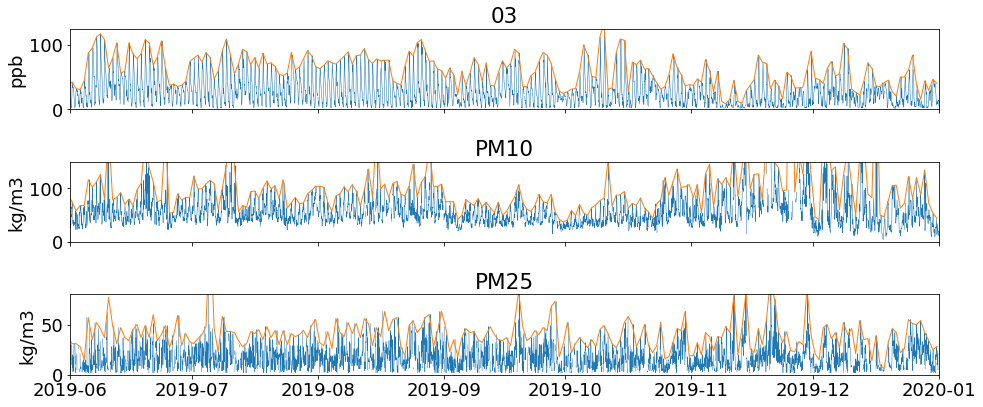

In [36]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(14, 6))
ax = axs[0]
tit = '03'
units = 'ppb'
ax.plot(num2date(time), o3, lw=0.5)
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 125)

ax = axs[1]
tit = 'PM10'
units = 'kg/m3'
ax.plot(num2date(time), pm10, lw=0.5)
ax.plot(num2date(time_day), pm10_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 150)

ax = axs[2]
tit = 'PM25'
units = 'kg/m3'
ax.plot(num2date(time), pm25, lw=0.5)
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 80)

fi1 = date2num(datetime.datetime.strptime('2019-06', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
ax.set_xlim(fi1, fi2)
fig.tight_layout()
plt.savefig('Jair_2019.png', bbox_inches='tight')

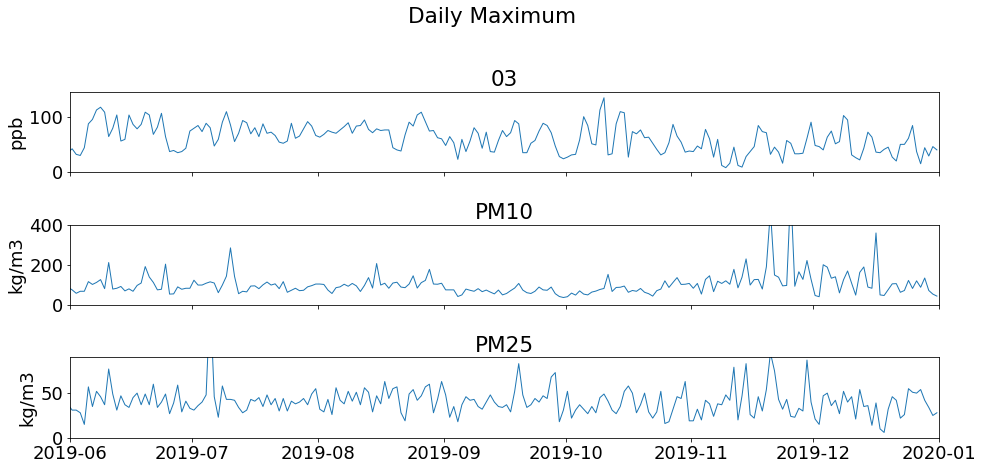

In [34]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(14, 6))
ax = axs[0]
tit = '03'
units = 'ppb'
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 145)

ax = axs[1]
tit = 'PM10'
units = 'kg/m3'
ax.plot(num2date(time_day), pm10_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 400)

ax = axs[2]
tit = 'PM25'
units = 'kg/m3'
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 90)

fi1 = date2num(datetime.datetime.strptime('2019-06', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
ax.set_xlim(fi1, fi2)
fig.suptitle('Daily Maximum', y=1.1)
fig.tight_layout()
plt.savefig('Jair_2019.png', bbox_inches='tight')

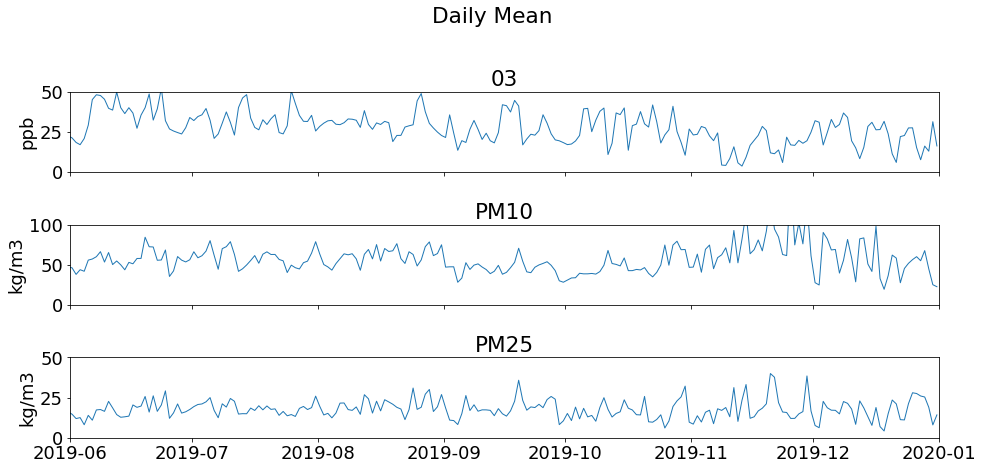

In [35]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(14, 6))
ax = axs[0]
tit = '03'
units = 'ppb'
ax.plot(num2date(time_day), o3_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 50)

ax = axs[1]
tit = 'PM10'
units = 'kg/m3'
ax.plot(num2date(time_day), pm10_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 100)

ax = axs[2]
tit = 'PM25'
units = 'kg/m3'
ax.plot(num2date(time_day), pm25_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 50)

fi1 = date2num(datetime.datetime.strptime('2019-06', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
ax.set_xlim(fi1, fi2)
fig.suptitle('Daily Mean', y=1.1)
fig.tight_layout()
plt.savefig('Jair_2019.png', bbox_inches='tight')